In [ ]:
#관련 라이브러리 설치
!pip install transformers ultralytics matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 12.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# 업로드된 파일 확인 (Google Drive 폴더 경로)
drive_path = "/content/drive/MyDrive"
print("Drive에 있는 파일:", os.listdir(drive_path))



Drive에 있는 파일: ['Classroom', '제목 없는 설문지.gform', '고객 의견.gform', '정태희_사진.jpg', '.ipynb_checkpoints', 'ColabNotebooks', 'Colab Notebooks', '100k_images_val.zip', 'bdd100k_det_20_labels_trainval.zip', '100k_images_train.zip']


In [ ]:
import zipfile
import os

# 파일 경로 정의
train_zip_path = "/content/drive/MyDrive/100k_images_train.zip"
val_zip_path = "/content/drive/MyDrive/100k_images_val.zip"
label_zip_path = "/content/drive/MyDrive/bdd100k_det_20_labels_trainval.zip"

# 출력 디렉토리 정의
train_dir = "/content/bdd100k/images/train/"
val_dir = "/content/bdd100k/images/val/"
label_dir = "/content/bdd100k/labels/"

# 디렉토리 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)

# Train 데이터 압축 해제
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

# Validation 데이터 압축 해제
with zipfile.ZipFile(val_zip_path, 'r') as zip_ref:
    zip_ref.extractall(val_dir)

# 라벨 데이터 압축 해제
with zipfile.ZipFile(label_zip_path, 'r') as zip_ref:
    zip_ref.extractall(label_dir)

print("압축 해제 완료!")


압축 해제 완료!


In [ ]:
import os

# Train 이미지 디렉토리 탐색
print("===== Train 이미지 경로 탐색 =====")
for root, dirs, files in os.walk("/content/bdd100k/images/train"):
    print(f"현재 경로: {root}")
    print(f"하위 디렉토리: {dirs}")
    print(f"파일: {files[:5]}")  # 상위 5개 파일만 출력
    print("-" * 50)

# Validation 이미지 디렉토리 탐색
print("\n===== Validation 이미지 경로 탐색 =====")
for root, dirs, files in os.walk("/content/bdd100k/images/val"):
    print(f"현재 경로: {root}")
    print(f"하위 디렉토리: {dirs}")
    print(f"파일: {files[:5]}")  # 상위 5개 파일만 출력
    print("-" * 50)

# Test 이미지 디렉토리 탐색
print("\n===== Test 이미지 경로 탐색 =====")
for root, dirs, files in os.walk("/content/bdd100k/images/test"):
    print(f"현재 경로: {root}")
    print(f"하위 디렉토리: {dirs}")
    print(f"파일: {files[:5]}")  # 상위 5개 파일만 출력
    print("-" * 50)

# Detection 라벨 디렉토리 탐색
print("\n===== Detection 라벨 경로 탐색 =====")
for root, dirs, files in os.walk("/content/bdd100k/labels"):
    print(f"현재 경로: {root}")
    print(f"하위 디렉토리: {dirs}")
    print(f"파일: {files[:5]}")  # 상위 5개 파일만 출력
    print("-" * 50)


===== Train 이미지 경로 탐색 =====
현재 경로: /content/bdd100k/images/train
하위 디렉토리: ['bdd100k']
파일: []
--------------------------------------------------
현재 경로: /content/bdd100k/images/train/bdd100k
하위 디렉토리: ['images']
파일: []
--------------------------------------------------
현재 경로: /content/bdd100k/images/train/bdd100k/images
하위 디렉토리: ['100k']
파일: []
--------------------------------------------------
현재 경로: /content/bdd100k/images/train/bdd100k/images/100k
하위 디렉토리: ['train']
파일: []
--------------------------------------------------
현재 경로: /content/bdd100k/images/train/bdd100k/images/100k/train
하위 디렉토리: []
파일: ['37167c7e-f734cf5c.jpg', '3e5841aa-af9ae741.jpg', '46157cf0-3f8f2755.jpg', '3897b382-e6540864.jpg', '9db4f8d8-f9c8d405.jpg']
--------------------------------------------------

===== Validation 이미지 경로 탐색 =====
현재 경로: /content/bdd100k/images/val
하위 디렉토리: ['bdd100k']
파일: []
--------------------------------------------------
현재 경로: /content/bdd100k/images/val/bdd100k
하위 디렉토리: ['images']
파일: 

In [ ]:
# Train 이미지 디렉토리
train_images_dir = "/content/bdd100k/images/train/bdd100k/images/100k/train"

# Validation 이미지 디렉토리
val_images_dir = "/content/bdd100k/images/val/bdd100k/images/100k/val"

# Detection 라벨 파일 경로
train_labels_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_train.json"
val_labels_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_val.json"


In [ ]:
# Train, Validation 이미지 샘플 확인
print("Train 이미지 샘플:", os.listdir(train_images_dir)[:5])
print("Validation 이미지 샘플:", os.listdir(val_images_dir)[:5])

# Detection 라벨 파일 확인
print("Train 라벨 파일 경로:", train_labels_path)
print("Validation 라벨 파일 경로:", val_labels_path)


Train 이미지 샘플: ['37167c7e-f734cf5c.jpg', '3e5841aa-af9ae741.jpg', '46157cf0-3f8f2755.jpg', '3897b382-e6540864.jpg', '9db4f8d8-f9c8d405.jpg']
Validation 이미지 샘플: ['c5bd516c-decd0287.jpg', 'c4725a9d-9d57ea61.jpg', 'c5b64f27-b5bd4388.jpg', 'be362fff-99b5dd8b.jpg', 'c411687d-73471431.jpg']
Train 라벨 파일 경로: /content/bdd100k/labels/bdd100k/labels/det_20/det_train.json
Validation 라벨 파일 경로: /content/bdd100k/labels/bdd100k/labels/det_20/det_val.json


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


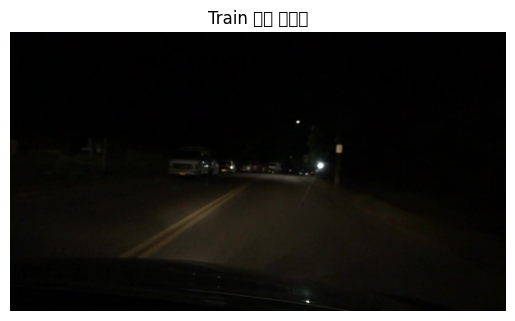

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Train 이미지 샘플 경로
sample_image_path = os.path.join(train_images_dir, os.listdir(train_images_dir)[0])  # 첫 번째 이미지 선택

# 이미지 불러오기 및 시각화
image = Image.open(sample_image_path)
plt.imshow(image)
plt.axis("off")
plt.title("Train 샘플 이미지")
plt.show()


In [ ]:
import json

# Train 라벨 파일 로드
with open(train_labels_path, 'r') as f:
    train_labels = json.load(f)

# Validation 라벨 파일 로드
with open(val_labels_path, 'r') as f:
    val_labels = json.load(f)

# 라벨 데이터 샘플 출력 (상위 2개만)
print("Train 라벨 데이터 샘플:", train_labels[:2])
print("Validation 라벨 데이터 샘플:", val_labels[:2])


Train 라벨 데이터 샘플: [{'name': '0000f77c-6257be58.jpg', 'attributes': {'weather': 'clear', 'timeofday': 'daytime', 'scene': 'city street'}, 'timestamp': 10000, 'labels': [{'id': '0', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'G'}, 'category': 'traffic light', 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}}, {'id': '1', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'G'}, 'category': 'traffic light', 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}}, {'id': '2', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'NA'}, 'category': 'traffic sign', 'box2d': {'x1': 1105.66915985699, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}}, {'id': '3', 'attributes': {'occluded': False, 'truncated': True, 'trafficLightColor': 'NA'}, 'category': 'traffic sign', 'box2d': {'x1': 0.0, 'y1': 0.246631, 'x2': 100.381647, 'y2': 122.825696}}, {'id': '4'

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch

# CLIP 모델 및 프로세서 로드
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 샘플 이미지 경로
sample_image_path = os.path.join(train_images_dir, os.listdir(train_images_dir)[0])

# 이미지와 텍스트 프롬프트
image = Image.open(sample_image_path)
texts = ["a car", "a traffic light", "a person", "a building"]

# 이미지와 텍스트를 처리
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Similarity 계산
logits_per_image = outputs.logits_per_image  # 이미지와 텍스트의 유사도
probs = logits_per_image.softmax(dim=1)  # 확률화

# 결과 출력
for i, text in enumerate(texts):
    print(f"'{text}'의 확률: {probs[0][i].item():.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

'a car'의 확률: 0.7112
'a traffic light'의 확률: 0.2305
'a person'의 확률: 0.0533
'a building'의 확률: 0.0050


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 90.5MB/s]



image 1/1 /content/bdd100k/images/train/bdd100k/images/100k/train/073873be-32a8b6b8.jpg: 384x640 5 persons, 2 cars, 3 traffic lights, 95.8ms
Speed: 10.7ms preprocess, 95.8ms inference, 867.9ms postprocess per image at shape (1, 3, 384, 640)


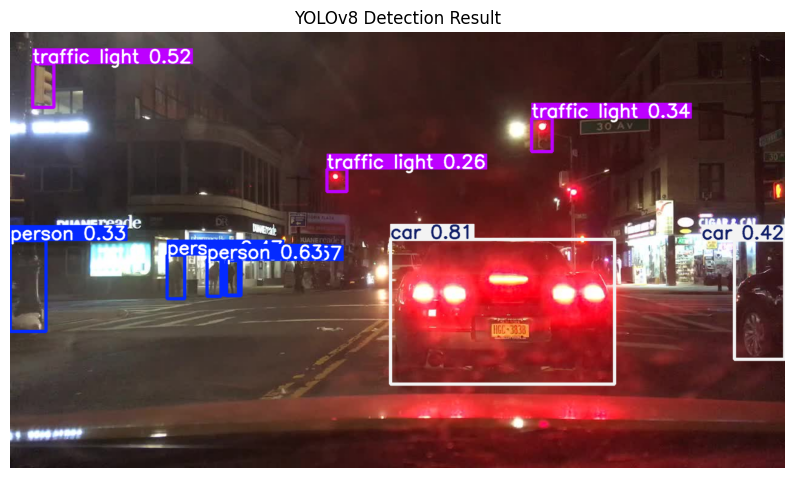

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# YOLOv8 모델 로드
model = YOLO("yolov8n.pt")  # "yolov8s.pt", "yolov8m.pt" 등 다른 모델을 사용할 수도 있음

# 이미지 경로
sample_image_path = "/content/bdd100k/images/train/bdd100k/images/100k/train/073873be-32a8b6b8.jpg"

# 객체 탐지 수행
results = model(sample_image_path)

# 결과 시각화
for result in results:  # YOLOv8은 결과를 리스트로 반환
    annotated_image = result.plot()  # 바운딩 박스와 라벨이 포함된 이미지 반환

    # 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image[..., ::-1])  # OpenCV는 BGR로 로드하므로 RGB로 변환
    plt.axis("off")
    plt.title("YOLOv8 Detection Result")
    plt.show()


In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# 사전 학습된 YOLOv8 모델 로드
model = YOLO("yolov8n.pt")  # 'yolov8s.pt', 'yolov8m.pt' 등도 사용 가능

# Validation 이미지 디렉토리
val_images_dir = "/content/bdd100k/images/val/bdd100k/images/100k/val"

# 결과 저장을 위한 디렉토리 생성
output_dir = "/content/yolo_zeroshot_results"
os.makedirs(output_dir, exist_ok=True)

# Validation 이미지 탐지 수행
image_files = os.listdir(val_images_dir)[:10]  # 상위 10개 파일만 사용
for image_file in image_files:
    image_path = os.path.join(val_images_dir, image_file)
    results = model(image_path)  # 탐지 수행

    # 결과 시각화 및 저장
    for result in results:
        annotated_image = result.plot()  # 탐지된 이미지 시각화
        output_path = os.path.join(output_dir, f"detected_{image_file}")
        plt.imsave(output_path, annotated_image[..., ::-1])  # BGR -> RGB 변환하여 저장

print(f"탐지 결과가 {output_dir} 디렉토리에 저장되었습니다.")



image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c5bd516c-decd0287.jpg: 384x640 3 cars, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c4725a9d-9d57ea61.jpg: 384x640 1 car, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c5b64f27-b5bd4388.jpg: 384x640 (no detections), 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/be362fff-99b5dd8b.jpg: 384x640 4 cars, 1 truck, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c411687d-73471431.jpg: 384x640 13 cars, 1 truck, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.3ms p

In [ ]:
# 탐지 결과 수집 및 분석
from collections import Counter

detections = Counter()
for image_file in image_files:
    image_path = os.path.join(val_images_dir, image_file)
    results = model(image_path)
    for result in results:
        for box in result.boxes.data:  # 탐지된 박스 정보
            class_id = int(box[-1])  # 클래스 ID
            class_name = model.names[class_id]  # 클래스 이름
            detections[class_name] += 1

# 결과 출력
print("탐지된 객체 수:")
for class_name, count in detections.items():
    print(f"{class_name}: {count}")



image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c5bd516c-decd0287.jpg: 384x640 3 cars, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c4725a9d-9d57ea61.jpg: 384x640 1 car, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c5b64f27-b5bd4388.jpg: 384x640 (no detections), 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/be362fff-99b5dd8b.jpg: 384x640 4 cars, 1 truck, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/bdd100k/images/val/bdd100k/images/100k/val/c411687d-73471431.jpg: 384x640 13 cars, 1 truck, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.1ms p

In [ ]:
import yaml

# YAML 파일 내용 정의
data = {
    "path": "/content/bdd100k",  # 데이터셋 기본 경로
    "train": "images/train/bdd100k/images/100k/train",  # 학습 데이터 경로
    "val": "images/val/bdd100k/images/100k/val",        # 검증 데이터 경로
    "names": [
        "car",
        "person",
        "traffic light",
        "tree",
        "obstacle",
        "bicycle",
        "motorcycle",
        "pedestrian crossing"
    ]
}

# YAML 파일 저장
yaml_file_path = "/content/bdd100k/custom_train.yaml"
with open(yaml_file_path, "w") as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"YAML 파일이 생성되었습니다: {yaml_file_path}")


YAML 파일이 생성되었습니다: /content/bdd100k/custom_train.yaml


In [ ]:
import os
import random
import shutil

def create_sample_dataset(source_dir, target_dir, num_samples):
    os.makedirs(target_dir, exist_ok=True)
    all_files = os.listdir(source_dir)
    sampled_files = random.sample(all_files, num_samples)
    for file in sampled_files:
        shutil.copy(os.path.join(source_dir, file), target_dir)

# Train 데이터 샘플링
create_sample_dataset(
    source_dir="/content/bdd100k/images/train/bdd100k/images/100k/train",
    target_dir="/content/bdd100k/images/train_sample",
    num_samples=1000  # 샘플 이미지 수
)

# Validation 데이터 샘플링
create_sample_dataset(
    source_dir="/content/bdd100k/images/val/bdd100k/images/100k/val",
    target_dir="/content/bdd100k/images/val_sample",
    num_samples=200  # 샘플 이미지 수
)

print("Train 및 Validation 데이터 샘플링 완료!")


Train 및 Validation 데이터 샘플링 완료!


In [ ]:
yaml_content = """
path: /content/bdd100k
train: images/train_sample
val: images/val_sample
names:
  0: car
  1: person
  2: traffic light
  3: tree
  4: obstacle
  5: bicycle
  6: motorcycle
  7: pedestrian crossing
"""

# YAML 파일 저장
with open("/content/bdd100k/custom_train_sample.yaml", "w") as yaml_file:
    yaml_file.write(yaml_content)

print("YAML 파일 생성 완료: custom_train_sample.yaml")


YAML 파일 생성 완료: custom_train_sample.yaml


In [ ]:
# Validation JSON 경로
val_json_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_val.json"

# YOLO 라벨 저장 디렉토리
val_yolo_dir = "/content/bdd100k/labels/val_yolo/"
os.makedirs(val_yolo_dir, exist_ok=True)

# BDD100K 라벨을 YOLO 형식으로 변환
def convert_bdd100k_to_yolo(json_path, output_dir):
    import json
    from tqdm import tqdm

    with open(json_path, "r") as f:
        data = json.load(f)

    for item in tqdm(data):
        file_name = item["name"].replace(".jpg", ".txt")
        labels = item["labels"]
        yolo_labels = []

        for label in labels:
            category_id = label["category"]  # 클래스 ID
            box2d = label["box2d"]  # 박스 좌표
            x_center = (box2d["x1"] + box2d["x2"]) / 2
            y_center = (box2d["y1"] + box2d["y2"]) / 2
            width = box2d["x2"] - box2d["x1"]
            height = box2d["y2"] - box2d["y1"]

            # YOLO 형식으로 변환 (정규화 필요)
            img_width = item.get("width", 1280)  # 이미지 너비
            img_height = item.get("height", 720)  # 이미지 높이
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height

            yolo_labels.append(f"{category_id} {x_center} {y_center} {width} {height}")

        # YOLO 형식으로 저장
        with open(os.path.join(output_dir, file_name), "w") as f:
            f.write("\n".join(yolo_labels))

# 라벨 변환 실행
convert_bdd100k_to_yolo(val_json_path, val_yolo_dir)

# 결과 확인
val_labels = os.listdir(val_yolo_dir)
print(f"YOLO 라벨 변환 완료: {len(val_labels)}개의 파일 생성")



100%|██████████| 10000/10000 [00:01<00:00, 5556.74it/s]


YOLO 라벨 변환 완료: 10000개의 파일 생성


In [ ]:
import os
import json
from tqdm import tqdm

def convert_bdd100k_to_yolo(json_path, output_dir, img_width=1280, img_height=720):
    os.makedirs(output_dir, exist_ok=True)  # 출력 디렉토리 생성

    with open(json_path, "r") as f:
        data = json.load(f)

    for item in tqdm(data, desc="Converting BDD100K labels to YOLO format"):
        file_name = item["name"].replace(".jpg", ".txt")  # 파일 이름 생성
        labels = item.get("labels", [])  # 레이블 데이터 가져오기
        yolo_labels = []

        for label in labels:
            # category 및 box2d 정보 확인
            category = label.get("category", None)
            box2d = label.get("box2d", None)

            if not category or not box2d:
                continue  # category 또는 box2d가 없으면 무시

            # 클래스 ID 매핑
            class_id = class_mapping.get(category, None)
            if class_id is None:
                continue  # 매핑되지 않은 클래스는 무시

            # box2d 좌표
            x1, y1, x2, y2 = box2d["x1"], box2d["y1"], box2d["x2"], box2d["y2"]
            x_center = (x1 + x2) / 2 / img_width
            y_center = (y1 + y2) / 2 / img_height
            width = (x2 - x1) / img_width
            height = (y2 - y1) / img_height

            # YOLO 형식 추가
            yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

        # YOLO 라벨 저장
        if yolo_labels:
            output_file = os.path.join(output_dir, file_name)
            with open(output_file, "w") as out_f:
                out_f.write("\n".join(yolo_labels))

# 클래스 매핑 정의
class_mapping = {
    "car": 0,
    "traffic light": 1,
    "traffic sign": 2,
    "pedestrian": 3,
    "truck": 4,
}

# 변환 실행
train_json_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_train.json"
train_yolo_dir = "/content/bdd100k/labels/train_yolo/"

convert_bdd100k_to_yolo(train_json_path, train_yolo_dir)

# 변환 결과 확인
train_labels = os.listdir(train_yolo_dir)
print(f"YOLO 라벨 변환 완료: {len(train_labels)}개의 파일 생성")



Converting BDD100K labels to YOLO format: 100%|██████████| 69863/69863 [00:09<00:00, 7310.17it/s]


YOLO 라벨 변환 완료: 69850개의 파일 생성


In [ ]:
# 샘플 파일 확인
sample_file = os.path.join(train_yolo_dir, train_labels[0])
with open(sample_file, "r") as f:
    print(f"샘플 라벨 파일 내용:\n{f.read()}")


샘플 라벨 파일 내용:
1 0.382386 0.235663 0.008398 0.025592
1 0.504150 0.233531 0.004799 0.021327
1 0.373989 0.233531 0.005998 0.029858
1 0.499352 0.232464 0.004799 0.027725
1 0.572530 0.284715 0.009597 0.017062
2 0.567132 0.234597 0.015595 0.023460
2 0.804767 0.059630 0.029779 0.061677
0 0.443868 0.304443 0.009597 0.014929
0 0.435471 0.306576 0.009597 0.010663
0 0.424074 0.310841 0.013196 0.019194
0 0.322669 0.346692 0.021707 0.041652
0 0.292539 0.346933 0.046894 0.058321
0 0.203246 0.372036 0.055236 0.074885
0 0.144483 0.385045 0.091082 0.091521
0 0.473139 0.301777 0.009597 0.014929
0 0.485136 0.301777 0.011996 0.014929
0 0.503131 0.299644 0.007198 0.019194
0 0.517526 0.309242 0.009597 0.021327
0 0.524124 0.313507 0.008398 0.021327
0 0.536289 0.321272 0.020328 0.020213
0 0.580611 0.328320 0.025400 0.042885
0 0.607519 0.324781 0.038427 0.062759
0 0.619893 0.339140 0.025599 0.055531
0 0.493114 0.312288 0.014396 0.029858
0 0.459613 0.328283 0.037189 0.053317
0 0.053079 0.398528 0.105796 0.142621

In [ ]:
import os

val_yolo_dir = "/content/bdd100k/labels/val_yolo/"
files = os.listdir(val_yolo_dir)
print(f"라벨 디렉토리 내 파일 샘플: {files[:5]}")



라벨 디렉토리 내 파일 샘플: ['c3c0f47b-3d4e0313.txt', 'bcaf73c1-3deecc6b.txt', 'bd8aa347-4a6405a9.txt', 'c4353b9c-9d50cbe9.txt', 'c586b898-17285cc9.txt']


In [ ]:
# 생성된 첫 번째 파일 내용 확인
sample_file = os.path.join(val_yolo_dir, files[0])  # 첫 번째 파일 경로
print(f"샘플 라벨 파일 경로: {sample_file}")

# 파일 내용 출력
with open(sample_file, "r") as f:
    print(f"샘플 라벨 파일 내용:\n{f.read()}")


샘플 라벨 파일 경로: /content/bdd100k/labels/val_yolo/c3c0f47b-3d4e0313.txt
샘플 라벨 파일 내용:
traffic sign 0.6252724031250001 0.3113710069444445 0.028170367187499944 0.013064516666666668
traffic sign 0.625884801953125 0.3429435909722222 0.017147178906250015 0.010887098611111097
traffic sign 0.6326211949218751 0.3756048875 0.015922380468750053 0.006532258333333295
traffic light 0.62710960234375 0.38649198541666663 0.009798389062500057 0.019596776388888928
traffic light 0.36316551328125 0.3560081111111111 0.008573589062500008 0.02395161666666665
traffic sign 0.35520432421875003 0.32987907569444447 0.017147179687500014 0.010887098611111097
traffic sign 0.35030512890625 0.3462097201388889 0.017147179687500014 0.013064518055555554
traffic sign 0.296413994140625 0.34947585000000003 0.012247986718750025 0.028306455555555526
pedestrian 0.9314720402343749 0.40500005208333334 0.011023186718749934 0.01741935694444447
car 0.37413742217071205 0.4243280838312006 0.07461015215392415 0.09198911567093214
car 0.6546

In [ ]:
import os
import shutil

# 디렉토리 경로
train_labels_dir = "/content/bdd100k/labels/train_yolo"
val_labels_dir = "/content/bdd100k/labels/val_yolo"

# 디렉토리 생성
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# YOLO 라벨 디렉토리로 파일 이동
for label_file in os.listdir("/content/bdd100k/labels/train_yolo/"):
    shutil.move(
        f"/content/bdd100k/labels/train_yolo/{label_file}",
        f"{train_labels_dir}/{label_file}"
    )

for label_file in os.listdir("/content/bdd100k/labels/val_yolo/"):
    shutil.move(
        f"/content/bdd100k/labels/val_yolo/{label_file}",
        f"{val_labels_dir}/{label_file}"
    )

print("YOLO 라벨 파일 이동 완료!")


YOLO 라벨 파일 이동 완료!


In [ ]:
class_mapping = {
    "car": 0,
    "traffic light": 1,
    "traffic sign": 2,
    "tree": 3,
    "pedestrian crossing": 4,
    "bicycle": 5,
}


In [ ]:
import os
import json
from tqdm import tqdm

def convert_bdd100k_to_yolo(json_path, output_dir, img_width=1280, img_height=720):
    os.makedirs(output_dir, exist_ok=True)  # 출력 디렉토리 생성

    with open(json_path, "r") as f:
        data = json.load(f)

    for item in tqdm(data, desc=f"Converting {os.path.basename(json_path)} to YOLO format"):
        file_name = item["name"].replace(".jpg", ".txt")  # 텍스트 파일 이름 생성
        labels = item.get("labels", [])  # 레이블 가져오기
        yolo_labels = []

        for label in labels:
            category = label.get("category", None)
            box2d = label.get("box2d", None)

            # category 및 box2d가 없는 경우 건너뜀
            if not category or not box2d:
                continue

            # 클래스 ID 매핑
            class_id = class_mapping.get(category, None)
            if class_id is None:
                continue  # 매핑되지 않은 클래스 무시

            # 바운딩 박스 좌표 계산 및 정규화
            x1, y1, x2, y2 = box2d["x1"], box2d["y1"], box2d["x2"], box2d["y2"]
            x_center = (x1 + x2) / 2 / img_width
            y_center = (y1 + y2) / 2 / img_height
            width = (x2 - x1) / img_width
            height = (y2 - y1) / img_height

            # YOLO 형식으로 추가
            yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

        # YOLO 라벨 파일 저장
        if yolo_labels:
            output_file = os.path.join(output_dir, file_name)
            with open(output_file, "w") as out_f:
                out_f.write("\n".join(yolo_labels))


In [ ]:
train_json_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_train.json"
train_yolo_dir = "/content/bdd100k/labels/train_yolo/"

# Train 데이터 YOLO 변환
convert_bdd100k_to_yolo(train_json_path, train_yolo_dir)


Converting det_train.json to YOLO format: 100%|██████████| 69863/69863 [00:11<00:00, 5874.82it/s]


In [ ]:
val_json_path = "/content/bdd100k/labels/bdd100k/labels/det_20/det_val.json"
val_yolo_dir = "/content/bdd100k/labels/val_yolo/"

# Validation 데이터 YOLO 변환
convert_bdd100k_to_yolo(val_json_path, val_yolo_dir)


Converting det_val.json to YOLO format: 100%|██████████| 10000/10000 [00:02<00:00, 4369.54it/s]


In [ ]:
# Train 데이터 라벨 확인
train_labels = os.listdir(train_yolo_dir)
print(f"Train YOLO 라벨 파일 개수: {len(train_labels)}")

# Validation 데이터 라벨 확인
val_labels = os.listdir(val_yolo_dir)
print(f"Validation YOLO 라벨 파일 개수: {len(val_labels)}")


Train YOLO 라벨 파일 개수: 69850
Validation YOLO 라벨 파일 개수: 10000


In [ ]:
# 샘플 라벨 파일 확인
sample_train_file = os.path.join(train_yolo_dir, train_labels[0])
with open(sample_train_file, "r") as f:
    print(f"Train 샘플 라벨 파일 내용:\n{f.read()}")

sample_val_file = os.path.join(val_yolo_dir, val_labels[0])
with open(sample_val_file, "r") as f:
    print(f"Validation 샘플 라벨 파일 내용:\n{f.read()}")


Train 샘플 라벨 파일 내용:
1 0.382386 0.235663 0.008398 0.025592
1 0.504150 0.233531 0.004799 0.021327
1 0.373989 0.233531 0.005998 0.029858
1 0.499352 0.232464 0.004799 0.027725
1 0.572530 0.284715 0.009597 0.017062
2 0.567132 0.234597 0.015595 0.023460
2 0.804767 0.059630 0.029779 0.061677
0 0.443868 0.304443 0.009597 0.014929
0 0.435471 0.306576 0.009597 0.010663
0 0.424074 0.310841 0.013196 0.019194
0 0.322669 0.346692 0.021707 0.041652
0 0.292539 0.346933 0.046894 0.058321
0 0.203246 0.372036 0.055236 0.074885
0 0.144483 0.385045 0.091082 0.091521
0 0.473139 0.301777 0.009597 0.014929
0 0.485136 0.301777 0.011996 0.014929
0 0.503131 0.299644 0.007198 0.019194
0 0.517526 0.309242 0.009597 0.021327
0 0.524124 0.313507 0.008398 0.021327
0 0.536289 0.321272 0.020328 0.020213
0 0.580611 0.328320 0.025400 0.042885
0 0.607519 0.324781 0.038427 0.062759
0 0.619893 0.339140 0.025599 0.055531
0 0.493114 0.312288 0.014396 0.029858
0 0.459613 0.328283 0.037189 0.053317
0 0.053079 0.398528 0.105796 0.

In [ ]:
import os

# 디렉토리 생성
os.makedirs("/content/bdd100k/images/train/", exist_ok=True)
os.makedirs("/content/bdd100k/images/val/", exist_ok=True)
os.makedirs("/content/bdd100k/labels/train_yolo/", exist_ok=True)
os.makedirs("/content/bdd100k/labels/val_yolo/", exist_ok=True)

print("디렉토리 구조 생성 완료!")


디렉토리 구조 생성 완료!


In [ ]:
import shutil

# 원본 이미지 디렉토리
original_train_images_dir = "/content/bdd100k/images/train/bdd100k/images/100k/train/"
original_val_images_dir = "/content/bdd100k/images/val/bdd100k/images/100k/val/"

# 대상 디렉토리
target_train_images_dir = "/content/bdd100k/images/train/"
target_val_images_dir = "/content/bdd100k/images/val/"

# 이미지 이동
for image_file in os.listdir(original_train_images_dir):
    shutil.move(
        os.path.join(original_train_images_dir, image_file),
        os.path.join(target_train_images_dir, image_file)
    )

for image_file in os.listdir(original_val_images_dir):
    shutil.move(
        os.path.join(original_val_images_dir, image_file),
        os.path.join(target_val_images_dir, image_file)
    )

print("이미지 파일 이동 완료!")


이미지 파일 이동 완료!


In [ ]:
# 원본 라벨 디렉토리
original_train_labels_dir = "/content/bdd100k/labels/train_yolo/"
original_val_labels_dir = "/content/bdd100k/labels/val_yolo/"

# 대상 디렉토리
target_train_labels_dir = "/content/bdd100k/labels/train_yolo/"
target_val_labels_dir = "/content/bdd100k/labels/val_yolo/"

# 라벨 이동
for label_file in os.listdir(original_train_labels_dir):
    shutil.move(
        os.path.join(original_train_labels_dir, label_file),
        os.path.join(target_train_labels_dir, label_file)
    )

for label_file in os.listdir(original_val_labels_dir):
    shutil.move(
        os.path.join(original_val_labels_dir, label_file),
        os.path.join(target_val_labels_dir, label_file)
    )

print("라벨 파일 이동 완료!")


라벨 파일 이동 완료!


In [ ]:
# 학습 데이터 이름 확인
train_images = set(os.listdir("/content/bdd100k/images/train/"))
train_labels = set(os.listdir("/content/bdd100k/labels/train_yolo/"))

# 확장자 제거
train_images = {os.path.splitext(f)[0] for f in train_images}
train_labels = {os.path.splitext(f)[0] for f in train_labels}

print("이미지와 라벨 이름 일치 여부:", train_images == train_labels)


이미지와 라벨 이름 일치 여부: False


In [ ]:
print("이미지에만 있는 파일:", train_images - train_labels)
print("라벨에만 있는 파일:", train_labels - train_images)


이미지에만 있는 파일: {'75e66365-45cebb67', '612affad-42702404', '7764bde0-03b1070a', '7cddaf5e-2bdf3965', '71be111b-3d2c42bf', '5dc66059-52bfaff7', '5cd4c6d7-2051e443', '61676670-5ddf4aa4', '48f20d4e-504d2377', '66753960-186df654', '5ee6af4d-b34992f0', '5b54f9f0-848cd09b', '6e0fa2a3-a8f2be95', '70cc96e1-1802a164', '679c58f7-e9a258c2', '62bd3830-aa6cb431', '5cc5736c-1b3b8a9b', '6fcbd17b-9cd6c3a2', '5d178102-9d5e50e2', '7aca5bc0-23859d6f', '5811624d-0c858bd8', '6051b591-f7ec53c8', '5de74ad7-9f445ae3', '6188d9b2-08ac3765', '6032f7e2-a7062c48', '321877a3-f277463d', '57dd03e1-7b415b61', '66838ab6-1d4062e5', '72024824-3cf37c08', '647e8e1c-0141c492', '282678b0-5f4e4eb3', '7adaeab3-10ec73b5', '56bcdb00-0a1074d2', '5e412e85-d1452b76', '67c665d7-662c6e08', '943a830f-faccdf0b', '7d2efdc4-6e8949dc', '5de4c788-84dbc745', '272cd572-f7289b9d', '718c99cd-80508f57', '60855380-49af8931', '5cf522b8-a0144375', '7751b61d-71561cda', '7360cc7a-138da2b5', '66ed92d6-a7529a59', '5b7255d9-350ca0b7', '765f15fb-ef824308',

In [ ]:
# 이미지 디렉토리 경로
train_images_dir = "/content/bdd100k/images/train/"
train_labels_dir = "/content/bdd100k/labels/train_yolo/"

# 이미지 파일 이름 가져오기 (확장자 확인)
train_images = {
    os.path.splitext(f)[0]
    for f in os.listdir(train_images_dir)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))  # 이미지 파일만 선택
}

# 라벨 파일 이름 가져오기
train_labels = {
    os.path.splitext(f)[0]
    for f in os.listdir(train_labels_dir)
}

# 라벨이 없는 이미지 확인 및 삭제
images_without_labels = train_images - train_labels
for img in images_without_labels:
    image_path = os.path.join(train_images_dir, f"{img}.jpg")
    if os.path.exists(image_path):  # 파일 존재 여부 확인
        os.remove(image_path)

print(f"라벨 없는 이미지 제거 완료: {len(images_without_labels)}개 제거됨")



라벨 없는 이미지 제거 완료: 16개 제거됨


In [ ]:
# 이미지와 라벨 이름 일치 여부 확인
train_images = set(os.listdir(train_images_dir))
train_labels = set(os.listdir(train_labels_dir))

# 확장자를 제거하여 이름만 비교
train_images = {os.path.splitext(f)[0] for f in train_images}
train_labels = {os.path.splitext(f)[0] for f in train_labels}

print("이미지와 라벨 이름 일치 여부:", train_images == train_labels)


이미지와 라벨 이름 일치 여부: False


In [ ]:
import os

# 디렉토리 경로
train_images_dir = "/content/bdd100k/images/train/"
train_labels_dir = "/content/bdd100k/labels/train_yolo/"

# 이미지 및 라벨 파일 이름 수집
train_images = {
    os.path.splitext(f)[0]
    for f in os.listdir(train_images_dir)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))  # 이미지 파일만 선택
}

train_labels = {
    os.path.splitext(f)[0]
    for f in os.listdir(train_labels_dir)
}

# 이름이 일치하지 않는 파일 출력
images_without_labels = train_images - train_labels
labels_without_images = train_labels - train_images

print(f"이미지에만 있는 파일: {len(images_without_labels)}개")
print(f"라벨에만 있는 파일: {len(labels_without_images)}개")


이미지에만 있는 파일: 0개
라벨에만 있는 파일: 0개


In [ ]:
# YAML 파일 생성
yaml_content = """
# 학습 데이터 및 검증 데이터 경로
train: /content/bdd100k/images/train/  # 학습 데이터 이미지 경로
val: /content/bdd100k/images/val/      # 검증 데이터 이미지 경로

# 총 클래스 수
nc: 6  # car, traffic light, traffic sign, tree, pedestrian crossing, bicycle

# 클래스 이름
names:
  0: car
  1: traffic light
  2: traffic sign
  3: tree
  4: pedestrian crossing
  5: bicycle
"""

yaml_path = "/content/bdd100k/custom_train.yaml"

# YAML 파일 저장
with open(yaml_path, "w") as yaml_file:
    yaml_file.write(yaml_content)

print(f"YAML 파일 생성 완료: {yaml_path}")


YAML 파일 생성 완료: /content/bdd100k/custom_train.yaml


In [ ]:
# 라벨 파일 샘플 확인
train_labels_dir = "/content/bdd100k/labels/train_yolo/"
val_labels_dir = "/content/bdd100k/labels/val_yolo/"

train_sample = os.listdir(train_labels_dir)[0]
val_sample = os.listdir(val_labels_dir)[0]

with open(os.path.join(train_labels_dir, train_sample), "r") as f:
    print(f"Train 라벨 샘플:\n{f.read()}")

with open(os.path.join(val_labels_dir, val_sample), "r") as f:
    print(f"Val 라벨 샘플:\n{f.read()}")


Train 라벨 샘플:
1 0.382386 0.235663 0.008398 0.025592
1 0.504150 0.233531 0.004799 0.021327
1 0.373989 0.233531 0.005998 0.029858
1 0.499352 0.232464 0.004799 0.027725
1 0.572530 0.284715 0.009597 0.017062
2 0.567132 0.234597 0.015595 0.023460
2 0.804767 0.059630 0.029779 0.061677
0 0.443868 0.304443 0.009597 0.014929
0 0.435471 0.306576 0.009597 0.010663
0 0.424074 0.310841 0.013196 0.019194
0 0.322669 0.346692 0.021707 0.041652
0 0.292539 0.346933 0.046894 0.058321
0 0.203246 0.372036 0.055236 0.074885
0 0.144483 0.385045 0.091082 0.091521
0 0.473139 0.301777 0.009597 0.014929
0 0.485136 0.301777 0.011996 0.014929
0 0.503131 0.299644 0.007198 0.019194
0 0.517526 0.309242 0.009597 0.021327
0 0.524124 0.313507 0.008398 0.021327
0 0.536289 0.321272 0.020328 0.020213
0 0.580611 0.328320 0.025400 0.042885
0 0.607519 0.324781 0.038427 0.062759
0 0.619893 0.339140 0.025599 0.055531
0 0.493114 0.312288 0.014396 0.029858
0 0.459613 0.328283 0.037189 0.053317
0 0.053079 0.398528 0.105796 0.142621

In [ ]:
# 이미지와 라벨 이름 비교
train_images_dir = "/content/bdd100k/images/train/"
train_labels_dir = "/content/bdd100k/labels/train_yolo/"

train_images = {os.path.splitext(f)[0] for f in os.listdir(train_images_dir) if f.endswith(".jpg")}
train_labels = {os.path.splitext(f)[0] for f in os.listdir(train_labels_dir)}

images_without_labels = train_images - train_labels
labels_without_images = train_labels - train_images

print(f"이미지에만 있는 파일: {images_without_labels}")
print(f"라벨에만 있는 파일: {labels_without_images}")


이미지에만 있는 파일: set()
라벨에만 있는 파일: set()


In [ ]:
# YAML 파일 수정
yaml_content = """
# 학습 데이터 및 검증 데이터 경로
train: /content/bdd100k/images/train/  # 학습 데이터 이미지 경로
val: /content/bdd100k/images/val/      # 검증 데이터 이미지 경로

# 총 클래스 수
nc: 3  # car, traffic light, traffic sign

# 클래스 이름
names:
  0: car
  1: traffic light
  2: traffic sign
"""

yaml_path = "/content/bdd100k/custom_train.yaml"

# YAML 파일 저장
with open(yaml_path, "w") as yaml_file:
    yaml_file.write(yaml_content)

print(f"YAML 파일 수정 완료: {yaml_path}")


YAML 파일 수정 완료: /content/bdd100k/custom_train.yaml


In [ ]:
# 디렉토리 설정
train_images_dir = "/content/bdd100k/images/train/"
train_labels_dir = "/content/bdd100k/labels/train_yolo/"

# 이미지와 라벨 파일 이름 수집
train_images = {os.path.splitext(f)[0] for f in os.listdir(train_images_dir) if f.endswith(".jpg")}
train_labels = {os.path.splitext(f)[0] for f in os.listdir(train_labels_dir)}

# 이름 불일치 확인
images_without_labels = train_images - train_labels
labels_without_images = train_labels - train_images

print(f"이미지에만 있는 파일: {images_without_labels}")
print(f"라벨에만 있는 파일: {labels_without_images}")


이미지에만 있는 파일: set()
라벨에만 있는 파일: set()


In [ ]:
# 데이터셋 캐시 파일 삭제
import glob
cache_files = glob.glob("/content/bdd100k/labels/*.cache")

for cache_file in cache_files:
    print(f"삭제 중: {cache_file}")
    os.remove(cache_file)

print("캐시 파일 삭제 완료!")


삭제 중: /content/bdd100k/labels/train.cache
삭제 중: /content/bdd100k/labels/val.cache
삭제 중: /content/bdd100k/labels/train_sample.cache
삭제 중: /content/bdd100k/labels/val_sample.cache
캐시 파일 삭제 완료!


In [ ]:
yaml_path = "/content/bdd100k/custom_train.yaml"
with open(yaml_path, "r") as f:
    print(f"YAML 파일 내용:\n{f.read()}")


YAML 파일 내용:

# 학습 데이터 및 검증 데이터 경로
train: /content/bdd100k/images/train/  # 학습 데이터 이미지 경로
val: /content/bdd100k/images/val/      # 검증 데이터 이미지 경로

# 총 클래스 수
nc: 3

# 클래스 이름
names:
  0: car
  1: traffic light
  2: traffic sign



In [ ]:
import os

# Train 라벨 파일 샘플 확인
train_labels_dir = "/content/bdd100k/labels/train_yolo/"
train_label_sample = os.listdir(train_labels_dir)[0]  # 첫 번째 파일

# 샘플 라벨 파일 경로
sample_label_path = os.path.join(train_labels_dir, train_label_sample)

# 파일 내용 확인
with open(sample_label_path, "r") as f:
    print(f"샘플 라벨 파일 경로: {sample_label_path}")
    print(f"샘플 라벨 파일 내용:\n{f.read()}")



샘플 라벨 파일 경로: /content/bdd100k/labels/train_yolo/7a7a3a44-73522c9c.txt
샘플 라벨 파일 내용:
1 0.382386 0.235663 0.008398 0.025592
1 0.504150 0.233531 0.004799 0.021327
1 0.373989 0.233531 0.005998 0.029858
1 0.499352 0.232464 0.004799 0.027725
1 0.572530 0.284715 0.009597 0.017062
2 0.567132 0.234597 0.015595 0.023460
2 0.804767 0.059630 0.029779 0.061677
0 0.443868 0.304443 0.009597 0.014929
0 0.435471 0.306576 0.009597 0.010663
0 0.424074 0.310841 0.013196 0.019194
0 0.322669 0.346692 0.021707 0.041652
0 0.292539 0.346933 0.046894 0.058321
0 0.203246 0.372036 0.055236 0.074885
0 0.144483 0.385045 0.091082 0.091521
0 0.473139 0.301777 0.009597 0.014929
0 0.485136 0.301777 0.011996 0.014929
0 0.503131 0.299644 0.007198 0.019194
0 0.517526 0.309242 0.009597 0.021327
0 0.524124 0.313507 0.008398 0.021327
0 0.536289 0.321272 0.020328 0.020213
0 0.580611 0.328320 0.025400 0.042885
0 0.607519 0.324781 0.038427 0.062759
0 0.619893 0.339140 0.025599 0.055531
0 0.493114 0.312288 0.014396 0.029858
0 0.4

In [ ]:
import glob
cache_files = glob.glob("/content/bdd100k/labels/*.cache")

for cache_file in cache_files:
    print(f"삭제 중: {cache_file}")
    os.remove(cache_file)

print("캐시 파일 삭제 완료!")


삭제 중: /content/bdd100k/labels/train.cache
삭제 중: /content/bdd100k/labels/val.cache
캐시 파일 삭제 완료!


In [ ]:
import ultralytics

print("Ultralytics 버전:", ultralytics.__version__)



Ultralytics 버전: 8.3.39


In [ ]:
import os

def check_dataset_structure(data_yaml):
    print(f"YAML 파일 확인: {data_yaml}")

    with open(data_yaml, "r") as file:
        lines = file.readlines()
        print("YAML 파일 내용:")
        for line in lines:
            print(line.strip())

    # 학습 및 검증 경로 확인
    train_path = "/content/bdd100k/images/train/"
    val_path = "/content/bdd100k/images/val/"
    print(f"학습 경로: {train_path}, 파일 수: {len(os.listdir(train_path))}")
    print(f"검증 경로: {val_path}, 파일 수: {len(os.listdir(val_path))}")

check_dataset_structure("/content/bdd100k/custom_train.yaml")


YAML 파일 확인: /content/bdd100k/custom_train.yaml
YAML 파일 내용:

# 학습 데이터 및 검증 데이터 경로
train: /content/bdd100k/images/train/  # 학습 데이터 이미지 경로
val: /content/bdd100k/images/val/      # 검증 데이터 이미지 경로

# 총 클래스 수
nc: 3

# 클래스 이름
names:
0: car
1: traffic light
2: traffic sign
학습 경로: /content/bdd100k/images/train/, 파일 수: 69851
검증 경로: /content/bdd100k/images/val/, 파일 수: 10001


In [ ]:
import zipfile
import os

# Google Drive ZIP 파일 경로
drive_dir = "/content/drive/MyDrive"
train_image_zip = os.path.join(drive_dir, "100k_images_train.zip")
val_image_zip = os.path.join(drive_dir, "100k_images_val.zip")
labels_zip = os.path.join(drive_dir, "bdd100k_det_20_labels_trainval.zip")

# 압축 해제 경로 설정
extract_dir = "/content/dataset_raw/"
os.makedirs(extract_dir, exist_ok=True)

# 압축 해제 함수
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"{zip_path} 압축 해제 완료!")

# ZIP 파일 압축 해제
unzip_file(train_image_zip, extract_dir)
unzip_file(val_image_zip, extract_dir)
unzip_file(labels_zip, extract_dir)



/content/drive/MyDrive/100k_images_train.zip 압축 해제 완료!
/content/drive/MyDrive/100k_images_val.zip 압축 해제 완료!
/content/drive/MyDrive/bdd100k_det_20_labels_trainval.zip 압축 해제 완료!


In [ ]:
import os
import shutil

# 새로운 데이터셋 디렉토리 생성
dataset_dir = "/content/dataset/"
train_images_dir = os.path.join(dataset_dir, "train/images/")
train_labels_dir = os.path.join(dataset_dir, "train/labels/")
val_images_dir = os.path.join(dataset_dir, "val/images/")
val_labels_dir = os.path.join(dataset_dir, "val/labels/")
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

print("새로운 데이터셋 디렉토리 구조 생성 완료!")


새로운 데이터셋 디렉토리 구조 생성 완료!


In [ ]:
import os
import json

# JSON 및 디렉토리 구조 확인 함수
def check_dataset_structure(json_path, images_dir):
    # JSON 파일 확인
    print(f"Checking JSON file: {json_path}")
    with open(json_path, "r") as f:
        data = json.load(f)

    print(f"Total items in JSON: {len(data)}")
    print("Sample item from JSON:")
    print(json.dumps(data[0], indent=4))

    # 이미지 디렉토리 확인
    print(f"\nChecking images directory: {images_dir}")
    if os.path.exists(images_dir):
        image_files = os.listdir(images_dir)
        print(f"Total images found: {len(image_files)}")
        print(f"Sample image files: {image_files[:5]}")
    else:
        print(f"ERROR: Directory {images_dir} does not exist!")

    # JSON 항목별 이미지 존재 여부 확인
    print("\nChecking if images listed in JSON exist in the directory...")
    missing_images = []
    for item in data:
        image_name = item["name"]
        if not os.path.exists(os.path.join(images_dir, image_name)):
            missing_images.append(image_name)

    if missing_images:
        print(f"Total missing images: {len(missing_images)}")
        print(f"Sample missing images: {missing_images[:5]}")
    else:
        print("All images listed in JSON are present in the directory.")

# 경로 설정
train_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_train.json"
train_images_dir = "/content/dataset_raw/bdd100k/images/100k/train/"
val_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_val.json"
val_images_dir = "/content/dataset_raw/bdd100k/images/100k/val/"

# 학습 데이터 확인
print("Checking training dataset...")
check_dataset_structure(train_json_path, train_images_dir)

# 검증 데이터 확인
print("\nChecking validation dataset...")
check_dataset_structure(val_json_path, val_images_dir)


Checking training dataset...
Checking JSON file: /content/dataset_raw/bdd100k/labels/det_20/det_train.json
Total items in JSON: 69863
Sample item from JSON:
{
    "name": "0000f77c-6257be58.jpg",
    "attributes": {
        "weather": "clear",
        "timeofday": "daytime",
        "scene": "city street"
    },
    "timestamp": 10000,
    "labels": [
        {
            "id": "0",
            "attributes": {
                "occluded": false,
                "truncated": false,
                "trafficLightColor": "G"
            },
            "category": "traffic light",
            "box2d": {
                "x1": 1125.902264,
                "y1": 133.184488,
                "x2": 1156.978645,
                "y2": 210.875445
            }
        },
        {
            "id": "1",
            "attributes": {
                "occluded": false,
                "truncated": false,
                "trafficLightColor": "G"
            },
            "category": "traffic light",
   

In [ ]:
import os
import json
import shutil
from tqdm import tqdm

# JSON 데이터를 YOLO 형식으로 변환하는 함수
def convert_bdd100k_to_yolo(json_path, output_labels_dir, images_dir, output_images_dir):
    # 출력 디렉토리 생성
    os.makedirs(output_labels_dir, exist_ok=True)
    os.makedirs(output_images_dir, exist_ok=True)

    with open(json_path, "r") as f:
        data = json.load(f)

    for item in tqdm(data, desc=f"Processing {json_path}"):
        image_name = item["name"]
        labels = item.get("labels", [])

        # YOLO 형식 라벨 저장
        yolo_labels = []
        for label in labels:
            category = label["category"]
            box2d = label["box2d"]

            # 클래스 맵핑
            class_map = {"car": 0, "traffic light": 1, "traffic sign": 2}
            if category not in class_map:
                continue
            class_id = class_map[category]

            # YOLO 형식 좌표 변환
            x1, y1, x2, y2 = box2d["x1"], box2d["y1"], box2d["x2"], box2d["y2"]
            img_width = item.get("width", 1280)  # 이미지 너비 기본값
            img_height = item.get("height", 720)  # 이미지 높이 기본값

            x_center = ((x1 + x2) / 2) / img_width
            y_center = ((y1 + y2) / 2) / img_height
            width = (x2 - x1) / img_width
            height = (y2 - y1) / img_height

            yolo_labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

        # 라벨 파일 저장
        if yolo_labels:
            label_file_path = os.path.join(output_labels_dir, image_name.replace(".jpg", ".txt"))
            with open(label_file_path, "w") as label_file:
                label_file.write("\n".join(yolo_labels))

        # 관련 이미지 복사
        src_image_path = os.path.join(images_dir, image_name)
        dst_image_path = os.path.join(output_images_dir, image_name)
        if os.path.exists(src_image_path):
            shutil.copy(src_image_path, dst_image_path)

# 경로 설정
train_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_train.json"
train_images_dir = "/content/dataset_raw/bdd100k/images/100k/train/"
output_train_labels_dir = "/content/dataset/train/labels/"
output_train_images_dir = "/content/dataset/train/images/"

val_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_val.json"
val_images_dir = "/content/dataset_raw/bdd100k/images/100k/val/"
output_val_labels_dir = "/content/dataset/val/labels/"
output_val_images_dir = "/content/dataset/val/images/"

# 변환 실행
convert_bdd100k_to_yolo(train_json_path, output_train_labels_dir, train_images_dir, output_train_images_dir)
convert_bdd100k_to_yolo(val_json_path, output_val_labels_dir, val_images_dir, output_val_images_dir)

print("YOLO 형식으로 데이터 변환 완료!")


Processing /content/dataset_raw/bdd100k/labels/det_20/det_train.json: 100%|██████████| 69863/69863 [02:12<00:00, 528.90it/s]
Processing /content/dataset_raw/bdd100k/labels/det_20/det_val.json: 100%|██████████| 10000/10000 [00:13<00:00, 737.72it/s]


YOLO 형식으로 데이터 변환 완료!


In [ ]:
# YAML 파일 작성
yaml_content = f"""
# 학습 데이터 및 검증 데이터 경로
train: {train_images_dir}  # 학습 데이터 이미지 경로
val: {val_images_dir}      # 검증 데이터 이미지 경로

# 총 클래스 수
nc: 3

# 클래스 이름
names:
  0: car
  1: traffic light
  2: traffic sign
"""

# YAML 파일 저장 경로
yaml_path = "/content/dataset/custom_train.yaml"

# YAML 파일 저장
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"YAML 파일 저장 완료: {yaml_path}")


YAML 파일 저장 완료: /content/dataset/custom_train.yaml


In [ ]:
import os
import shutil

# 원본 데이터 경로 (BDD100K 데이터셋)
output_images_dir = "/content/dataset_raw/bdd100k/images/100k"
output_labels_dir = "/content/dataset_raw/converted_labels"

# 변환된 라벨 디렉토리 생성
os.makedirs(output_labels_dir, exist_ok=True)

# 최종 데이터셋 폴더 경로
dataset_root = "/content/dataset"
train_images_dir = os.path.join(dataset_root, "train/images")
train_labels_dir = os.path.join(dataset_root, "train/labels")
val_images_dir = os.path.join(dataset_root, "val/images")
val_labels_dir = os.path.join(dataset_root, "val/labels")

# 최종 데이터셋 디렉토리 생성
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# 데이터 이동 함수
def move_data_safe(source_images, source_labels, target_images, target_labels, dataset_type):
    print(f"Moving {dataset_type} data...")
    if not os.path.exists(source_labels):
        print(f"Error: Source label directory {source_labels} does not exist.")
        return

    for label_file in os.listdir(source_labels):
        label_path = os.path.join(source_labels, label_file)
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(source_images, image_file)

        # 타겟 경로에 파일이 없을 때만 이동
        target_image_path = os.path.join(target_images, image_file)
        target_label_path = os.path.join(target_labels, label_file)

        if not os.path.exists(target_image_path) and not os.path.exists(target_label_path):
            if os.path.exists(image_path) and os.path.exists(label_path):
                shutil.copy(image_path, target_images)  # 이미지 이동
                shutil.copy(label_path, target_labels)  # 라벨 이동

    print(f"{dataset_type.capitalize()} data moved successfully!")
    print(f"{dataset_type.capitalize()} images: {len(os.listdir(target_images))}")
    print(f"{dataset_type.capitalize()} labels: {len(os.listdir(target_labels))}")

# 데이터 변환 경로
train_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_train.json"
val_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_val.json"
converted_train_labels_dir = os.path.join(output_labels_dir, "train")
converted_val_labels_dir = os.path.join(output_labels_dir, "val")

# 변환된 라벨 디렉토리 생성
os.makedirs(converted_train_labels_dir, exist_ok=True)
os.makedirs(converted_val_labels_dir, exist_ok=True)

# 라벨 변환 함수
def convert_bdd100k_to_yolo(json_path, output_labels_dir, images_dir):
    import json
    from tqdm import tqdm

    with open(json_path, "r") as f:
        data = json.load(f)

    for item in tqdm(data, desc=f"Processing {json_path}"):
        image_name = item["name"]
        labels = item.get("labels", [])

        # 이미지 파일 경로
        image_path = os.path.join(images_dir, image_name)
        if not os.path.exists(image_path):
            continue  # 이미지가 없는 경우 건너뜀

        # 라벨 파일 작성
        yolo_labels = []
        for label in labels:
            category = label["category"]
            if "box2d" not in label:
                continue
            box2d = label["box2d"]

            # 클래스 이름 -> ID 매핑
            class_id = {"car": 0, "traffic light": 1, "traffic sign": 2}.get(category)
            if class_id is None:
                continue  # 매핑되지 않는 클래스 건너뜀

            # YOLO 형식 변환
            x_center = (box2d["x1"] + box2d["x2"]) / 2
            y_center = (box2d["y1"] + box2d["y2"]) / 2
            width = box2d["x2"] - box2d["x1"]
            height = box2d["y2"] - box2d["y1"]

            # 정규화
            img_width, img_height = 1280, 720  # 가정: 고정 크기
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height

            yolo_labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

        # 라벨 저장
        label_file_path = os.path.join(output_labels_dir, image_name.replace(".jpg", ".txt"))
        with open(label_file_path, "w") as label_file:
            label_file.write("\n".join(yolo_labels))

# 라벨 변환
convert_bdd100k_to_yolo(train_json_path, converted_train_labels_dir, os.path.join(output_images_dir, "train"))
convert_bdd100k_to_yolo(val_json_path, converted_val_labels_dir, os.path.join(output_images_dir, "val"))

# Train 데이터 이동
move_data_safe(
    source_images=os.path.join(output_images_dir, "train"),
    source_labels=converted_train_labels_dir,
    target_images=train_images_dir,
    target_labels=train_labels_dir,
    dataset_type="train"
)

# Validation 데이터 이동
move_data_safe(
    source_images=os.path.join(output_images_dir, "val"),
    source_labels=converted_val_labels_dir,
    target_images=val_images_dir,
    target_labels=val_labels_dir,
    dataset_type="validation"
)


Processing /content/dataset_raw/bdd100k/labels/det_20/det_train.json: 100%|██████████| 69863/69863 [00:13<00:00, 5348.74it/s]
Processing /content/dataset_raw/bdd100k/labels/det_20/det_val.json: 100%|██████████| 10000/10000 [00:02<00:00, 4192.54it/s]


Moving train data...
Train data moved successfully!
Train images: 97012
Train labels: 69815
Moving validation data...
Validation data moved successfully!
Validation images: 10000
Validation labels: 9999


In [ ]:
import os
import shutil

def sync_images_labels(images_dir, labels_dir, dataset_type):
    """
    이미지와 라벨의 불일치 항목을 제거하여 정리합니다.
    """
    print(f"Checking {dataset_type} dataset...")

    # 이미지와 라벨 파일 세트 생성
    image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith(".jpg")}
    label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith(".txt")}

    # 이미지에만 있는 파일과 라벨에만 있는 파일 찾기
    images_without_labels = image_files - label_files
    labels_without_images = label_files - image_files

    print(f"{dataset_type} 이미지에만 있는 파일: {len(images_without_labels)}")
    print(f"{dataset_type} 라벨에만 있는 파일: {len(labels_without_images)}")

    # 이미지에만 있는 파일 제거
    for image in images_without_labels:
        os.remove(os.path.join(images_dir, f"{image}.jpg"))

    # 라벨에만 있는 파일 제거
    for label in labels_without_images:
        os.remove(os.path.join(labels_dir, f"{label}.txt"))

    print(f"{dataset_type} 데이터 정리 완료!")
    print(f"최종 이미지 개수: {len(os.listdir(images_dir))}")
    print(f"최종 라벨 개수: {len(os.listdir(labels_dir))}")

# Train 데이터 정리
train_images_dir = "/content/dataset/train/images"
train_labels_dir = "/content/dataset/train/labels"
sync_images_labels(train_images_dir, train_labels_dir, "Train")

# Validation 데이터 정리
val_images_dir = "/content/dataset/val/images"
val_labels_dir = "/content/dataset/val/labels"
sync_images_labels(val_images_dir, val_labels_dir, "Validation")


Checking Train dataset...
Train 이미지에만 있는 파일: 0
Train 라벨에만 있는 파일: 0
Train 데이터 정리 완료!
최종 이미지 개수: 96964
최종 라벨 개수: 69815
Checking Validation dataset...
Validation 이미지에만 있는 파일: 0
Validation 라벨에만 있는 파일: 0
Validation 데이터 정리 완료!
최종 이미지 개수: 9999
최종 라벨 개수: 9999


In [ ]:
import os
import json

def check_json_label_matching(json_path, images_dir, labels_dir):
    """
    JSON 파일에 있는 이미지와 실제 이미지 디렉토리, 라벨 디렉토리를 비교하여 매칭 상태를 점검합니다.
    """
    print(f"Checking JSON and dataset matching for {json_path}...")
    with open(json_path, "r") as f:
        json_data = json.load(f)

    # JSON에 있는 이미지 파일 이름
    json_image_names = {item["name"].replace(".jpg", "") for item in json_data}
    image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith(".jpg")}
    label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith(".txt")}

    # 매칭 상태 확인
    images_without_labels = image_files - label_files
    labels_without_images = label_files - image_files
    missing_in_json = image_files - json_image_names

    print(f"이미지에 라벨이 없는 파일: {len(images_without_labels)}")
    print(f"라벨에 이미지가 없는 파일: {len(labels_without_images)}")
    print(f"JSON에 없는 이미지: {len(missing_in_json)}")

    return images_without_labels, labels_without_images, missing_in_json

# Train 데이터 점검
train_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_train.json"
train_images_dir = "/content/dataset/train/images"
train_labels_dir = "/content/dataset/train/labels"
check_json_label_matching(train_json_path, train_images_dir, train_labels_dir)

# Validation 데이터 점검
val_json_path = "/content/dataset_raw/bdd100k/labels/det_20/det_val.json"
val_images_dir = "/content/dataset/val/images"
val_labels_dir = "/content/dataset/val/labels"
check_json_label_matching(val_json_path, val_images_dir, val_labels_dir)


Checking JSON and dataset matching for /content/dataset_raw/bdd100k/labels/det_20/det_train.json...
이미지에 라벨이 없는 파일: 0
라벨에 이미지가 없는 파일: 0
JSON에 없는 이미지: 0
Checking JSON and dataset matching for /content/dataset_raw/bdd100k/labels/det_20/det_val.json...
이미지에 라벨이 없는 파일: 0
라벨에 이미지가 없는 파일: 0
JSON에 없는 이미지: 0


(set(), set(), set())